# MODULE 3 - FINAL PROJECT

For this project, I'll be working with the Pitchfork Reviews dataset. Pitchfork is a music-centric online magazine. It was started in 1995 and grew out of independent music reviewing into a general publication format, but is still famed for its variety music reviews. Our data set includes reviews from 1999 to 2017, published by contributors and Pitchfork editor/writers on diverse range of albums from jazz to metal, rap to experimental.

I will start with examining my data points of score(review score) and check if it is normally distributed. The easiest way is simply to plot data distribution and visually check if the data follows a normal curve or not.


In [489]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sqlite3 
plt.style.use('seaborn')
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
np.random.seed(0)

In [490]:
# Connect database and create cursor here
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [491]:
c.execute("""SELECT score,genre FROM reviews JOIN genres USING (reviewid);""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data.describe()
data.genre.value_counts()

rock            9438
electronic      3874
experimental    1815
rap             1559
pop/r&b         1432
metal            862
folk/country     685
jazz             435
global           219
Name: genre, dtype: int64

In [492]:
# print('Rock Mean         : ', data[data.genre == 'rock'].score.mean())
# print('Electronic Mean   : ', data[data.genre == 'electronic'].score.mean())
# print('Experimental Mean : ', data[data.genre == 'experimental'].score.mean())
# print('Rap Mean          : ', data[data.genre == 'rap'].score.mean())
# print('Pop/R&B Mean          : ', data[data.genre == 'pop/r&b'].score.mean())
# print('Metal Mean        : ', data[data.genre == 'metal'].score.mean())
# print('Folk/Country Mean         : ', data[data.genre == 'folk/country'].score.mean())
# print('Jazz Mean         : ', data[data.genre == 'jazz'].score.mean())
# print('Global Mean       : ', data[data.genre == 'global'].score.mean())

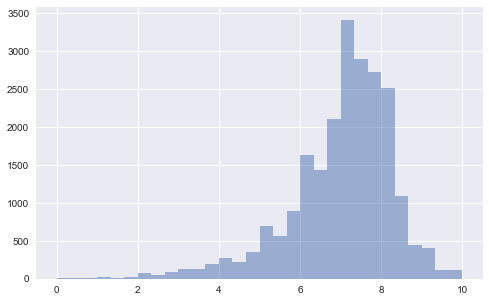

In [493]:
plt.figure(figsize = (8,5))
plt.hist(data.score, bins = 30, alpha= 0.5);

In the cell below, I will use seaborn distplot method to visualize a histogram of the distribution overlaid with the a probability density curve and apply scipy stats's _normaltest_ in order to see statistics and p-value if the results represent a normal distribution.

NormaltestResult(statistic=5070.8481672697635, pvalue=0.0)


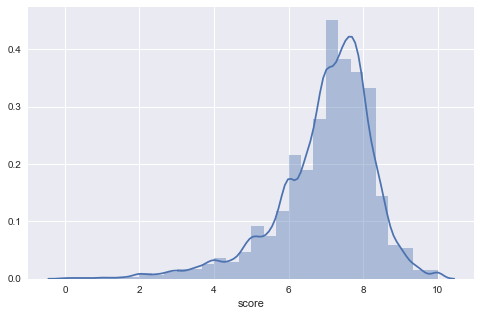

In [494]:
plt.figure(figsize = (8,5))
sns.distplot(data.score, bins = 30);
print(stats.normaltest(data.score))

## CENTRAL LIMIT THEOREM

As seen in the images above and can be concluded from the normal test, our score data is not normally distributed. Since our dataset is non-normal, that means we'll need to use the **Central Limit Theorem**. Central Limit Theorem states that under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases. 

In the cell below, I will create a function that takes in dataset, size of distribution to create, and size of each sample. This function will return a sample distribution of sample means of the given size.

In [495]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    return sample

def get_sample_mean(sample):
    return sum(sample)/len(sample)

def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

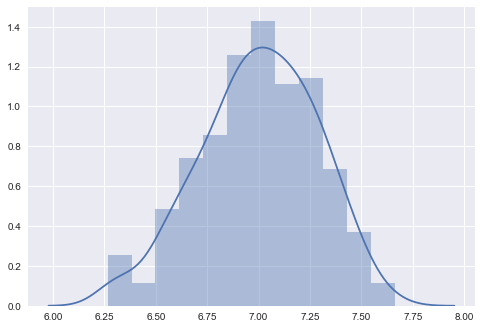

In [496]:
pop_score = np.array(data.score)
population = create_sample_distribution(pop_score, dist_size=300, n=20)

sns.distplot(population)

In [497]:
pop_mean = np.mean(population)
pop_std = np.std(population)
print("Population Mean:", pop_mean)
print("Population Standard Deviation", pop_std)

Population Mean: 7.00035
Population Standard Deviation 0.2825540553003384


## TWO SAMPLE T-TEST

**Question: _Is there a statistical difference between the average ratings of jazz music and metal music genres?_**

I will use jazz music and metal music data to compare their mean sample values. I will perform a two-sample test is a test on the data since I have two random samples, each independently obtained from a different given population.

Given two groups (jazz music and metal music), this test is only applicable when:

 - The two sample sizes (that is, the number n of participants of each group) are equal.
 - It can be assumed that the two distributions have the same variance.

### Hypothesis:

**Null Hypothesis(Ho):** There is no significant difference between mean values of jazz and metal data set.

**Alternative Hypothesis(Ha):** There is a significant difference between jazz and metal mean values.


### JAZZ DATA##

In [498]:
c.execute("""SELECT score FROM reviews JOIN genres using (reviewid)  WHERE genre ==  'jazz' ;""")
jazz_data = pd.DataFrame(c.fetchall())
jazz_data.columns = [x[0] for x in c.description]
jazz_data.describe()

,score
count,435.000000
mean,7.303908
std,1.251104
min,1.000000
25%,6.900000
50%,7.600000
75%,8.000000
max,10.000000


Length of Jazz Data: 435


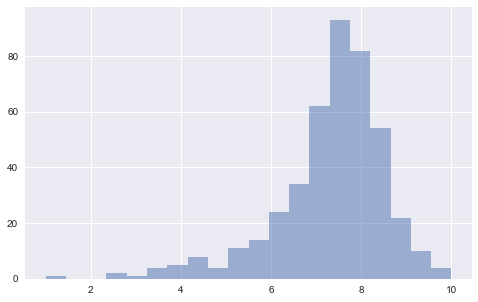

In [530]:
plt.figure(figsize = (8,5))
plt.hist(jazz_data.score, bins = 20, alpha = 0.5);
print('Length of Jazz Data:', len(jazz_data))

#### Sampling:

In [500]:
jazz_population = create_sample_distribution(np.array(jazz_data.score), dist_size=300, n=20)
jazz_mean = np.mean(jazz_population)
jazz_std = np.std(jazz_population)
print("Jazz Mean:", jazz_mean)
print("Jazz Standard Deviation", jazz_std)

Jazz Mean: 7.300366666666667
Jazz Standard Deviation 0.28589718237311973


#### Confidence Intervals:

In [501]:
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(jazz_population)-1,                # Degrees of freedom
                 loc = jazz_mean,                           # Sample mean
                 scale = jazz_std)                          # Standard deviation estimate

(6.737741119172414, 7.86299221416092)

### METAL DATA

In [502]:
c.execute("""SELECT score FROM reviews JOIN genres using (reviewid)  WHERE genre ==  'metal' ;""")
metal_data = pd.DataFrame(c.fetchall())
metal_data.columns = [x[0] for x in c.description]
metal_data.describe()

,score
count,862.000000
mean,6.950000
std,1.387799
min,0.200000
25%,6.500000
50%,7.300000
75%,7.900000
max,9.700000


Length of Metal Data: 862


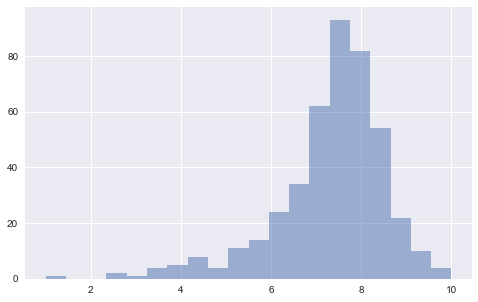

In [531]:
plt.figure(figsize = (8,5))
plt.hist(jazz_data.score, bins = 20, alpha = 0.5);
print('Length of Metal Data:', len(metal_data))

#### Sampling:

In [504]:
metal_population = create_sample_distribution(np.array(metal_data.score), dist_size=300, n=20)
metal_mean = np.mean(metal_population)
metal_std = np.std(metal_population)
print("Metal Mean:", metal_mean)
print("Metal Standard Deviation", metal_std)

Metal Mean: 6.953
Metal Standard Deviation 0.2969388264721653


#### Confidence Intervals:

In [505]:
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(metal_population)-1,               # Degrees of freedom
                 loc = metal_mean,                          # Sample mean
                 scale = metal_std)                         # Standard deviation estimate

(6.368645273487975, 7.537354726512025)

### CONDUCTING THE TEST

In [510]:
results = stats.ttest_ind(metal_population, jazz_population)

print ('Difference Between Mean Values:', metal_mean - jazz_mean)
print ('"The t-statistic for sample is', np.round(results[0], 2), 'and the p-value is', np.round((results[1]), 4))                      

Difference Between Mean Values: -0.3473666666666668
"The t-statistic for sample is -14.57 and the p-value is 0.0





Let's check if there is sufficient evidence to conclude that, at the alpha = 0.05 level of significance, there is a significant difference in the average score ratings of jazz and metal music.




In [511]:
t_crit = np.round(stats.t.ppf(1 - 0.95, df=29),3)
print('T-Critical Value:', t_crit)

T-Critical Value: -1.699


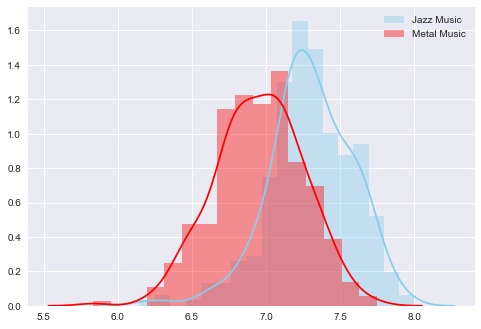

In [512]:
sns.distplot(jazz_population, color = 'skyblue', label = 'Jazz Music')
sns.distplot(metal_population, color = 'red', label = 'Metal Music')
plt.legend();

If t_statistical is greater than t_critical and p-value is smaller than the alpha = 0.05 level of significance, we reject our Alternative Hypothesis and fail to reject our Null Hypothesis.




_**Ho:**_ _There is no significant difference between mean values of jazz and metal data set._

_**Ha:**_ _There is a significant difference between jazz and metal mean values._

In [515]:
if (results[0]<t_crit) and (results[1]<0.05):
    print ('Null hypothesis rejected. Results are statistically significant with t-statistic =', 
           round(results[0], 2), 'and p-value =', np.round((results[1]), 2))
else:
    print ('Null hypothesis is Accepted')

Null hypothesis rejected. Results are statistically significant with t-statistic = -14.57 and p-value = 0.0


_**Conclusion:**_ _We fail to reject our Null Hypothesis and conclude there is no significant difference between average mean values of our jazz music and metal music review scores._

## ANOVA

In [516]:
c.execute("""SELECT pub_weekday, author_type, content FROM reviews JOIN content USING (reviewid);""")
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data['pub_weekday'] = data.pub_weekday.apply(lambda x: 'Monday' if x==0 else
                                     ('Tuesday' if x==1 else
                                     ('Wednesday' if x==2 else
                                     ('Thursday' if x==3 else 
                                     ('Friday' if x==4 else
                                     ('Saturday' if x==5 else "Sunday"))))))
data['content_len'] = data.content.apply(lambda x: len(x))

data['author_type'] = data.author_type.apply(lambda x: 'Pitchfork editor' if x=='senior editor' 
                                             else('Pitchfork editor' if x=='executive editor'
                                             else('Pitchfork editor' if x=='senior staff writer'
                                             else('Pitchfork editor' if x=='contributing editor'
                                             else('Pitchfork editor' if x=='associate staff write'
                                             else('Pitchfork editor' if x=='deputy news editor'
                                             else('Pitchfork editor' if x=='editor-in-chief'
                                             else('Pitchfork editor' if x=='tracks coordinator'
                                             else('Pitchfork editor' if x=='associate reviews editor'
                                             else('Pitchfork editor' if x=='associate editor'
                                             else('Pitchfork editor' if x=='assistant editor'
                                             else('Pitchfork editor' if x=='managing editor'
                                             else('Contributor' if x=='contributor'
                                             else None)))))))))))))

In [517]:
data.head()

,pub_weekday,author_type,content,content_len
0,Sunday,Contributor,"“Trip-hop” eventually became a ’90s punchline,...",9310
1,Saturday,Contributor,"Eight years, five albums, and two EPs in, the ...",2797
2,Saturday,Contributor,Minneapolis’ Uranium Club seem to revel in bei...,3565
3,Friday,Pitchfork editor,Kleenex began with a crash. It transpired one ...,7717
4,Friday,Pitchfork editor,It is impossible to consider a given release b...,3210


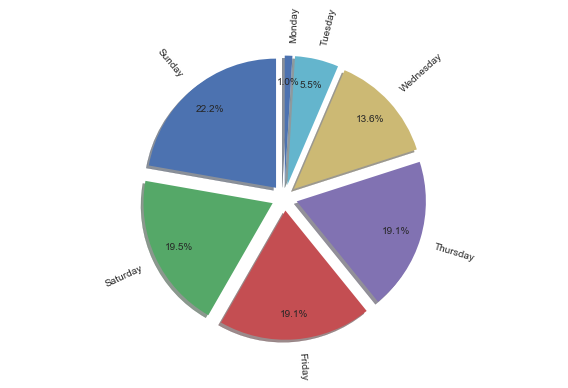

In [518]:
labels = list(data.pub_weekday.unique())
sizes = list(data.pub_weekday.value_counts())
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, rotatelabels= True, autopct='%1.1f%%',
        pctdistance=0.8, shadow=True, startangle=90)
ax1.axis('equal') 
# plt.title('Proportions of Review Publication by Day')
plt.tight_layout()
plt.show()

### 1. ONE-FACTOR ANOVA TEST

**Question: _Is there a significant effect of publication day on content length?_**

**Null Hypothesis(Ho):** There is no significant difference in average content length depending on which day it is published.

**Alternative Hypothesis(Ha):** There is a significant difference in average content length depending on which day it is published. 

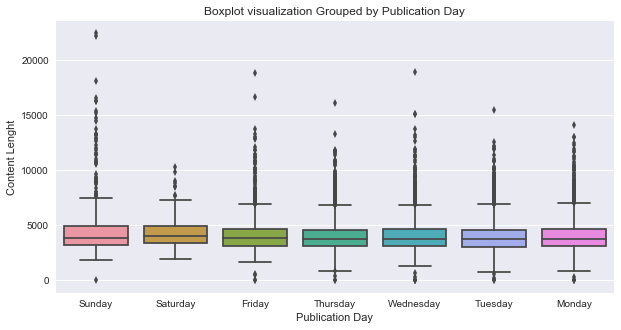

In [519]:
x = data.pub_weekday
y = data.content_len
plt.figure(figsize=(10,5))
sns.boxplot(x =x, y = y);
plt.xlabel('Publication Day')
plt.ylabel('Content Length')
plt.title('Boxplot visualization Grouped by Publication Day');

#### Ordinary Least Squares (OLS) Analysis:

In order to generate the ANOVA table, first we need to fit a linear model and then generate the table from this object. Our formula will be written as:

In [520]:
anova_pub_weekday = ols('content_len ~ C(pub_weekday)', data=data).fit()
anova_pub_weekday.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            content_len   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.66
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           4.36e-13
Time:                        15:38:15   Log-Likelihood:            -1.5979e+05
No. Observations:               18401   AIC:                         3.196e+05
Df Residuals:                   18394   BIC:                         3.196e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4094.9888     28.543    143.468      0.000    4039.042    4150.936
C(pub_weekday)[T.Monday]      -54.6201     37.349     -1.462      0.144    -127.827      18.587
C(pub_weekday)[T.Saturday]    297.7369    111.740      2.665      0.008      78.716     516.758
C(pub_weekday)[T.Sunday]      275.6835     53.319      5.170      0.000     171.173     380.194
C(pub_weekday)[T.Thursday]    -58.3908     37.353     -1.563      0.118    -131.607      14.825
C(pub_weekday)[T.Tuesday]    -102.0492     36.247     -2.815      0.005    -173.096     -31.002
C(pub_weekday)[T.Wednesday]   -57.0209     37.214     -1.532      0.125    -129.964      15.922
==============================================================================
Omnibus:                     9722.016   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120619.006
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      14.696   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Generating ANOVA Table:

In [521]:
anova_table = sm.stats.anova_lm(anova_pub_weekday, type = 2)
print(anova_table)

                     df        sum_sq       mean_sq          F        PR(>F)
C(pub_weekday)      6.0  1.429448e+08  2.382414e+07  11.664514  4.364468e-13
Residual        18394.0  3.756875e+10  2.042446e+06        NaN           NaN


_**Conclusion:**_ _We reject Null Hypothesis if p-value <= alpha =0.05 and F-Test > PR. Given data set, we reject our Null Hypothesis. The publication day of review has significant leffect on content length._

In [528]:
print('Average Content Length on Monday   : ', data[data.pub_weekday == 'Monday'].content_len.mean())
print('Average Content Length on Tuesday  : ', data[data.pub_weekday == 'Tuesday'].content_len.mean())
print('Average Content Length on Wednesday: ', data[data.pub_weekday == 'Wednesday'].content_len.mean())
print('Average Content Length on Thursday : ', data[data.pub_weekday == 'Thursday'].content_len.mean())
print('Average Content Length on Friday   : ', data[data.pub_weekday == 'Friday'].content_len.mean())
print('Average Content Length on Saturday : ', data[data.pub_weekday == 'Saturday'].content_len.mean())
print('Average Content Length on Sunday   : ', data[data.pub_weekday == 'Sunday'].content_len.mean())

Average Content Length on Monday   :  4040.36875
Average Content Length on Tuesday  :  3992.9396383186704
Average Content Length on Wednesday:  4037.9678950307093
Average Content Length on Thursday :  4036.59806708357
Average Content Length on Friday   :  4094.988831272437
Average Content Length on Saturday :  4392.725714285714
Average Content Length on Sunday   :  4370.6722939424035


### 2. MULTI-FACTOR ANOVA TESTING

**Question: _Is there a significant effect of publication day and author type on content length?_**

**Null Hypothesis(Ho):** There is no significant difference in average content length depending on which day it is published and by whom.

**Alternative Hypothesis(Ha):** There is a significant difference in average content length depending on which day it is published and whom. 

#### Ordinary Least Squares (OLS) Analysis:

In [526]:
anova_day_author = ols('content_len ~ C(pub_weekday) + C(author_type)', data=data).fit()
anova_day_author.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            content_len   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.91
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           3.13e-15
Time:                        15:40:02   Log-Likelihood:            -1.2522e+05
No. Observations:               14370   AIC:                         2.505e+05
Df Residuals:                   14362   BIC:                         2.505e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           4160.0265     32.097    129.610      0.000    4097.113    4222.940
C(pub_weekday)[T.Monday]             -54.9782     42.195     -1.303      0.193    -137.687      27.730
C(pub_weekday)[T.Saturday]           237.3121    126.852      1.871      0.061     -11.333     485.958
C(pub_weekday)[T.Sunday]             366.7780     66.267      5.535      0.000     236.886     496.670
C(pub_weekday)[T.Thursday]           -82.3520     42.240     -1.950      0.051    -165.148       0.444
C(pub_weekday)[T.Tuesday]            -98.5930     41.477     -2.377      0.017    -179.893     -17.293
C(pub_weekday)[T.Wednesday]          -53.5456     42.055     -1.273      0.203    -135.978      28.887
C(author_type)[T.Pitchfork editor]   165.4371     35.960      4.601      0.000      94.950     235.924
==============================================================================
Omnibus:                     7582.343   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90331.936
Skew:                           2.275   Prob(JB):                         0.00
Kurtosis:                      14.409   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Generating ANOVA Table:

In [527]:
anova_table = sm.stats.anova_lm(anova_day_author, type = 2)
print(anova_table)

                     df        sum_sq       mean_sq          F        PR(>F)
C(pub_weekday)      6.0  1.351413e+08  2.252355e+07  10.369126  1.692149e-11
C(author_type)      1.0  4.597388e+07  4.597388e+07  21.164915  4.250118e-06
Residual        14362.0  3.119676e+10  2.172174e+06        NaN           NaN


_**Conclusion:**_ _We reject Null Hypothesis if p-value <= alpha =0.05 and F-Test > PR. Given data set, we reject our Null Hypothesis._